# Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import stats 
from scipy.stats import pearsonr
from scipy.stats.stats import pearsonr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# 1.Exploring Data Analysis

In [2]:
#Reading csv file for salaries
salaries = pd.read_csv("salary.csv")
salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
#dataframe shape
salaries.shape

(514, 11)

In [4]:
#Checking columns and missing values
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [5]:
#Data summary
salaries.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [6]:
#Checking columns and their datatypes
salaries.columns.to_series().groupby(salaries.dtypes).groups

{dtype('int64'): Index(['exprior', 'yearsworked', 'yearsrank', 'degree', 'otherqual',
        'position', 'male', 'Field', 'yearsabs'],
       dtype='object'),
 dtype('float64'): Index(['salary', 'market'], dtype='object')}

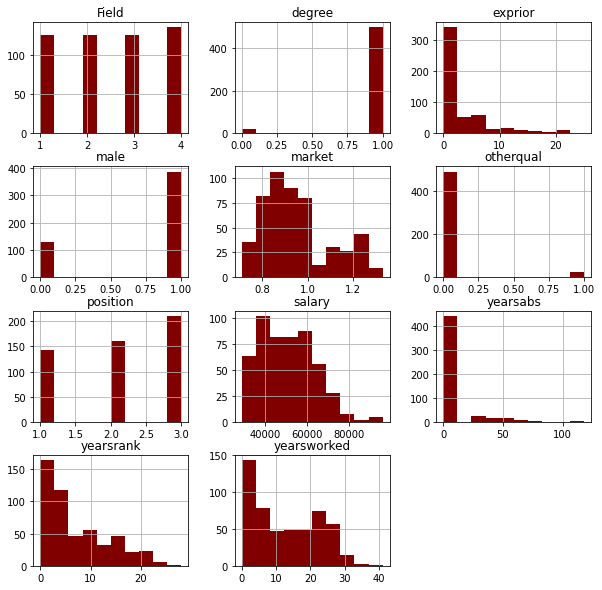

In [7]:
# Visualizing Histrograms
salaries.hist(figsize =(10, 10), color = "maroon")
_= plt.show()


In [8]:
#Checking the relatioships 
salaries.corr()["salary"].sort_values(ascending = False)

salary         1.000000
position       0.702122
yearsworked    0.623589
yearsrank      0.610706
market         0.407214
male           0.361564
otherqual      0.167137
exprior        0.119989
degree         0.044554
yearsabs      -0.069630
Field         -0.499316
Name: salary, dtype: float64

<Figure size 1800x1800 with 0 Axes>

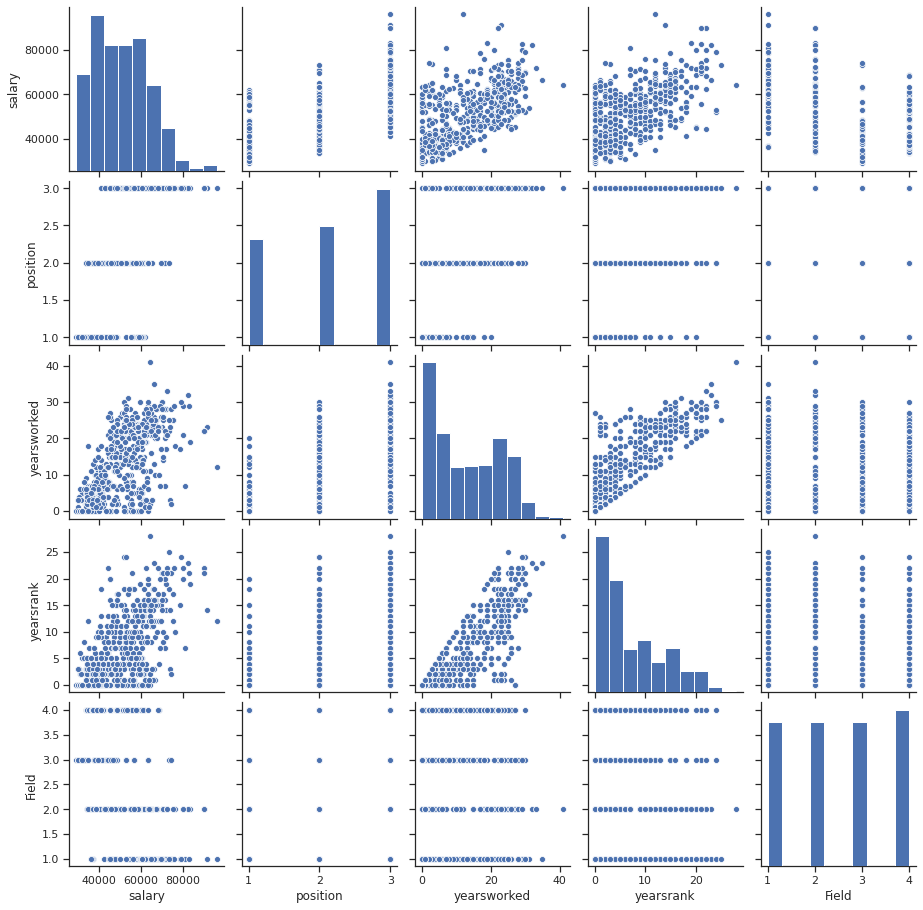

In [35]:
# Visualising data using pairplots
sns.set(style="ticks", color_codes=True)
plt.figure(figsize = (25,25))
sns.pairplot(salaries[["salary","position","yearsworked","yearsrank","Field"]])
_=plt.show();